# Problem Statement

**Problem Understanding** 🏥

Hospitals face significant challenges in managing resources effectively, especially when it comes to predicting and managing patient stay durations. Patient care is highly variable, influenced by factors such as the severity of illness 🩺, the type of admission (emergency 🚑, trauma 🩹, etc.), and patient demographics. This leads to operational inefficiencies, resource shortages, and increased healthcare costs 💸.

The variability in patient stay times and resource needs makes it harder to predict hospital demands, causing issues like overcrowding, long waiting times ⏱️, and insufficient staff allocation 👩‍⚕️👨‍⚕️. A system to better understand these patterns would significantly enhance hospital operations.


 **Problem Definition** 📊

The primary challenge here is that hospitals lack an efficient way to predict patient stay durations and their associated resource demands. By analyzing patient data, such as type of admission, severity of illness, and age 👵👶, hospitals can optimize bed allocation 🛏️, improve staff management, and provide more personalized care.

The goal is to use unsupervised machine learning techniques 🤖 to segment patients into meaningful clusters. These clusters can help predict:
- Patient stay durations ⏳ (short vs. long stays)
- Resource needs (beds 🛏️, staff 👨‍⚕️)
- Identification of high-risk patients who may need extended care ⚠️


**Business Impact** 💡

Solving this problem could significantly impact the hospital's business operations and overall efficiency. By understanding and predicting patient needs more accurately, hospitals can:
- **Optimize Resource Allocation** 🏥: Allocate beds and staff more effectively, preventing resource shortages and improving overall service delivery.
- **Reduce Waiting Times** ⏱️: Forecast patient inflow and resource demand, allowing hospitals to manage wait times and avoid overcrowding.
- **Improve Patient Outcomes** 😊: By managing care more effectively, patients will experience better outcomes, and hospitals may see higher satisfaction and reduced readmission rates.
- **Cost Savings** 💰: A more efficient operation can lead to savings by reducing unnecessary treatments, reducing overstaffing, and making better use of hospital resources.
- **Better Risk Management** 🛡️: Proactively identify high-risk patients and allocate the right resources to prevent costly complications.


**Project Goals and Scope** 🎯

The main objective of this project is to develop an unsupervised machine learning model that groups patients into clusters based on key features like demographics, type of admission, and severity of illness. This will help the hospital better understand their patient base and predict:
1. The types of patients being treated 🩺
2. The resource needs of these patients 🛏️👩‍⚕️
3. Which patients are at high risk of longer stays ⚠️

The project will cover:
- **Data Preprocessing and Feature Engineering** 🔧: Handling missing values, encoding categorical data, and creating new features.
- **Unsupervised Learning** 🤖: Using clustering algorithms like K-means and hierarchical clustering to segment the data.
- **Model Evaluation and Validation** ✅: Ensuring that the model works well and provides actionable insights.
- **Data Visualization and Insights** 📊: Presenting the results in a clear and understandable way for hospital administrators to act on.


# Imports

In [136]:
import kagglehub
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import mstats

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans



# Getting the Data

### Dataset Selection 📊

For this project, I chose a dataset from Kaggle to work with. 🎯

👉 **Important Note for Non-Students**:
If you're reading this notebook and you're not a student working on an academic project, please note that some of the steps here might not be directly usable in a real-world project. 🚨 In a real-world scenario, you'd need to carefully evaluate the relevance of each step and decide what should be included or excluded based on the business requirements, data quality, and model performance.

However, since this is an **Academic Project**, we will go through some steps that may not always be necessary for a production-level project. 📚 But don't worry! These steps are useful for learning, and they help us understand how to work with data and models in a structured way. 💡

So, while some things may seem unnecessary for real-world applications, it's all part of the learning process! 🚀


In [137]:
# Download latest version
path = kagglehub.dataset_download("nehaprabhavalkar/av-healthcare-analytics-ii")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nehaprabhavalkar/av-healthcare-analytics-ii/versions/1


In [138]:
# Verify the path and its contents
print("Dataset directory:", path)
print("Contents of the directory:", os.listdir(path))


Dataset directory: /root/.cache/kagglehub/datasets/nehaprabhavalkar/av-healthcare-analytics-ii/versions/1
Contents of the directory: ['healthcare']


In [139]:
# Recursively search for train_data.csv in the dataset directory
for root, dirs, files in os.walk(path):
    if 'train_data.csv' in files:
        train_file_path = os.path.join(root, 'train_data.csv')
        print("Found train_data.csv at:", train_file_path)
        break
else:
    print("train_data.csv not found!")


Found train_data.csv at: /root/.cache/kagglehub/datasets/nehaprabhavalkar/av-healthcare-analytics-ii/versions/1/healthcare/train_data.csv


In [140]:
# Load it into a DataFrame
df_train = pd.read_csv(train_file_path)
print(df_train.head())


   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397             

In [141]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [142]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

 **Dataset Overview** 🏥

This dataset contains patient and hospital-related information that will be used to build an unsupervised machine learning model. The features (or columns) in this dataset provide insights into both patient details and hospital resources. Let's break it down:

**Patient-Related Columns** 🧑‍⚕️
1. **patientid**: A unique identifier for each patient. This helps in tracking individual patients.
2. **Age**: The age of the patient, which can affect the length of stay and resource needs.
3. **Type of Admission**: This indicates whether the patient was admitted as an emergency, elective, or urgent case.
4. **Severity of Illness**: A classification that shows the seriousness of the patient's condition
5. **Visitors with Patient**: The number of visitors accompanying the patient,
6. **Admission_Deposit**: The amount paid as an initial deposit for the patient's admission.

**Hospital-Related Columns** 🏥
1. **case_id**: A unique identifier for each hospital case.
2. **Hospital_code**: A code representing the specific hospital where the patient is admitted.
3. **Hospital_type_code**: Indicates the type of hospital (e.g., general hospital, specialized hospital).
4. **City_Code_Hospital**: The code for the city where the hospital is located. This helps to understand regional patterns in admissions.
5. **Hospital_region_code**: The region or area where the hospital is located. Regional factors that influence patient volume and resource allocation.
6. **Available Extra Rooms in Hospital**: The number of extra rooms available in the hospital, providing insight into hospital capacity and resource management.
7. **Department**: The department in which the patient was admitted (e.g., cardiology, neurology), affecting treatment duration and resource usage.
8. **Ward_Type**: The type of ward (e.g., ICU, general ward), which has implications for the level of care the patient requires.
9. **Ward_Facility_Code**: A code for the facilities available in the ward, which may indicate whether specialized equipment or care is needed.
10. **Bed Grade**: The grade or type of bed assigned to the patient, which could reflect the severity of their condition and the level of care required.
11. **Stay**: This is the target variable that indicates the number of days the patient stays in the hospital. It is a crucial factor for hospital resource planning and optimization.


**Summary**  
- The **patient-related columns** give us a deeper understanding of the patient's characteristics and their potential needs (e.g., severity of illness, age).
- The **hospital-related columns** describe the hospital's infrastructure and resources, which are critical for optimizing patient care and managing hospital capacity effectively.
- By analyzing these features, we can gain insights into patient flow, resource allocation, and predict patient stays, helping hospitals improve operational efficiency.

This dataset is a powerful starting point for predicting hospital resource requirements and improving patient care strategies! 🚑


## Data Preprocessing

### Handeling null values

In [143]:
# 1. Check for missing values in the dataset
missing_data = df_train.isnull().sum()  # Count the missing values in each column
missing_data_percentage = (missing_data / len(df_train)) * 100  # Calculate the percentage of missing values
missing_data_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})

# Display missing data information
missing_data_info


,Missing Values,Percentage
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.035486


**🔍 Step 1: Check for Missing Data**

In this dataset, we have **two columns** with missing values. Before deciding how to handle these missing values, it's important to understand if the missingness is:

- **MNAR** (Missing Not At Random) ❌
- **MCAR** (Missing Completely At Random) 🎲
- **MAR** (Missing At Random) 📊

We assume that the missing data is **not MNAR** or **MCAR**. Thus, we will **investigate** the relationship between the columns with missing values and other features in the dataset. This will help us identify if the missing data is **random** or if it is **correlated** with certain variables.

Here's the plan:
1. **Check the number of missing values** in each column.
2. **Visualize** the missing data in a heatmap.
3. **Analyze the correlation** between the columns with missing data and other variables in the dataset.

Let's begin by analyzing the missing values in the dataset and checking if there's any correlation. 💡


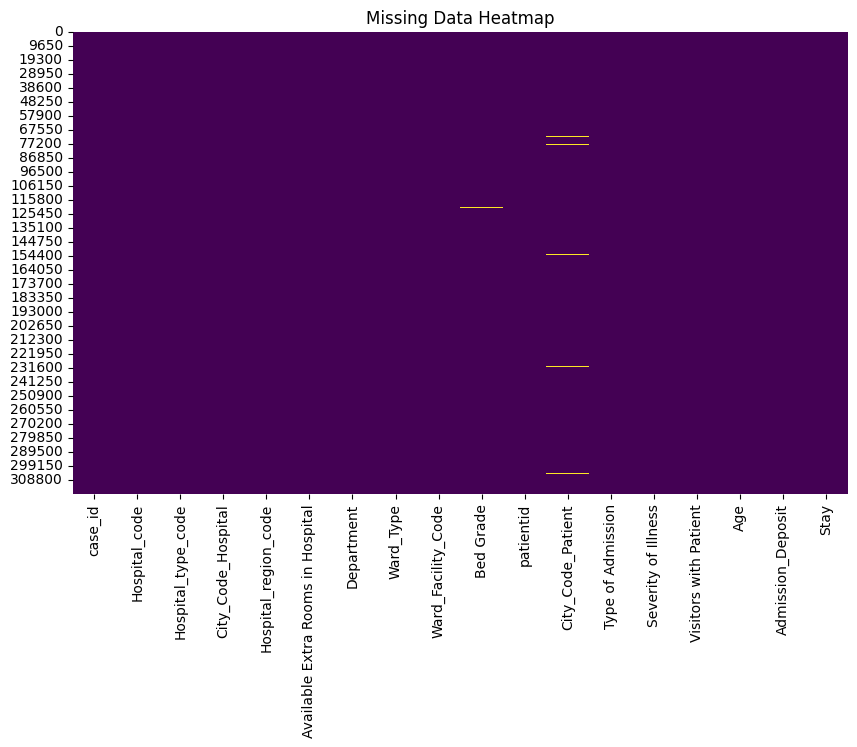

In [144]:

# 2. Visualize the missing data (let's  use a heatmap for this)
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


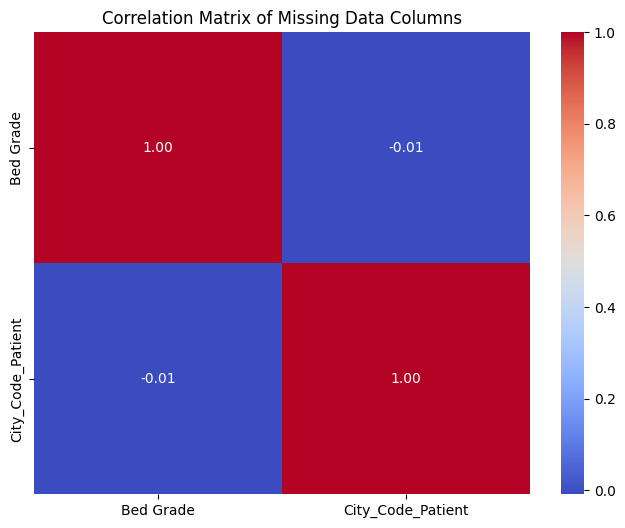

In [145]:
# 3. Check the correlation between the columns with missing data and other features
# Identify columns with missing data
missing_columns = df_train.columns[df_train.isnull().any()]

# Calculate correlation matrix of missing columns with other variables
correlation_matrix = df_train[missing_columns].corr()

# Optionally, create a correlation heatmap to visualize the relationship
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Correlation heatmap
plt.title('Correlation Matrix of Missing Data Columns')  # Add a title
plt.show()  # Display the heatmap


In [146]:
# Filter rows with missing data
data = df_train.copy()
missing_data_df = data[data.isnull().any(axis=1)]

# Display the rows with missing data
missing_data_df


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,11-20,4432.0,11-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415.0,11-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135.0,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418.0,0-10


In [147]:
# Find the most frequent value (mode) for each column in the missing data rows
mode_missing_data = missing_data_df.mode().iloc[0]

# Display the mode of missing data rows
print("Mode of missing data rows:")
print(mode_missing_data)

# Now, let's check how many times each value appears for specific columns in the rows with missing data

# Columns of interest
columns_of_interest = [
    'Hospital_code',
    'City_Code_Hospital',
    'Hospital_region_code',
    'Available Extra Rooms in Hospital',
    'Department',
    'Ward_Type',
    'Bed Grade',
    'Type of Admission',
    'Severity of Illness',
    'Visitors with Patient',
    'Age'
]

# Count the occurrences of each value in the specified columns
for col in columns_of_interest:
    print(f"\nValue counts for {col}:")
    print(missing_data_df[col].value_counts(),end='\n ------------------------------------------------- \n')


Mode of missing data rows:
case_id                                     192
Hospital_code                              23.0
Hospital_type_code                            a
City_Code_Hospital                          1.0
Hospital_region_code                          X
Available Extra Rooms in Hospital           4.0
Department                           gynecology
Ward_Type                                     R
Ward_Facility_Code                            F
Bed Grade                                   3.0
patientid                               90620.0
City_Code_Patient                           2.0
Type of Admission                     Emergency
Severity of Illness                    Moderate
Visitors with Patient                       2.0
Age                                       41-50
Admission_Deposit                        4430.0
Stay                                      21-30
Name: 0, dtype: object

Value counts for Hospital_code:
Hospital_code
23    454
14    411
6     409
26    395

 **Insight from Missing Data Analysis** 🧐

Okay, so here we can see something significant! Most of the missing data occurred when the department was **Gynecology**. 📊 This indicates that the missing values are not randomly distributed across departments, but rather seem to be concentrated in **Gynecology**. This could suggest some underlying pattern or issue related to this department, and further investigation might be needed to understand the root cause behind these missing values. 🚨


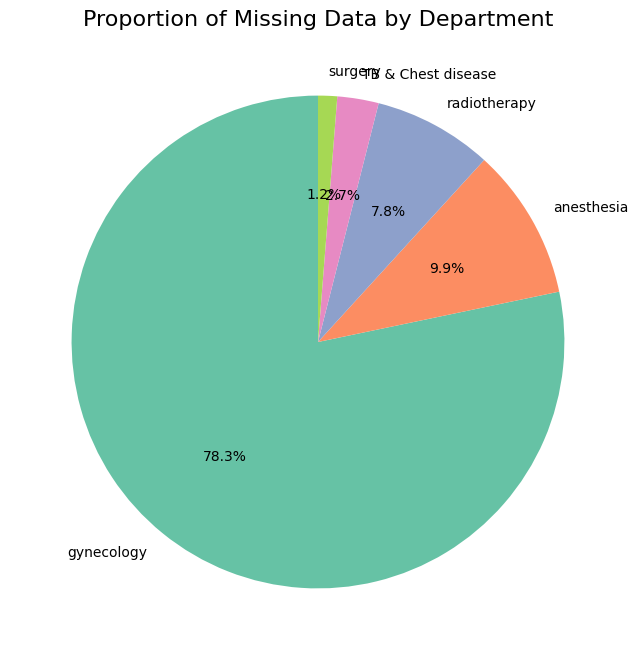

In [148]:
department_counts = missing_data_df['Department'].value_counts()

# Create a pie chart for the department counts
plt.figure(figsize=(8, 8))
department_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

# Add title
plt.title('Proportion of Missing Data by Department', fontsize=16)

# Show the plot
plt.ylabel('')  # Hide the y-axis label
plt.show()


 ### ⚠️  **Missing Data  and Imputation Strategy**

After analyzing the missing data, I found that the missing values are **not random**. Most of them are coming from the **gynecology** department 🏥.

So, instead of filling them randomly, I will use the **KNN imputer** 🤖 to handle the missing values more effectively. However, since **most of my data is not numeric and not scaled**, I need to prepare it first by:

1. **Encoding** the categorical data 🔢
2. **Scaling** the numerical data 📊

Once these steps are completed, I'll apply the **KNN imputer** to fill in the missing values with better accuracy. ✅


### Encoding
note i did the encoding before dealing with the outliers


In [149]:
onehot_columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code']
def onehot_encoding(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column])
        dummies=dummies.astype(int)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df


In [150]:
df_train=onehot_encoding(df_train,onehot_columns)


In [151]:
#encoding ordinal columns
df_train['Type of Admission']=df_train['Type of Admission'].replace({'Emergency':0,'Trauma':1,'Urgent':2})
df_train['Severity of Illness']=df_train['Severity of Illness'].replace({'Minor':0,'Moderate':1,'Extreme':2})
df_train['Age']=df_train['Age'].replace({'0-10':0,
 '11-20':1,
 '21-30':2,
 '31-40':3,
 '41-50':4,
 '51-60':5,
 '61-70':6,
 '71-80':7,
 '81-90':8,
 '91-100':9})
df_train['Stay']=df_train['Stay'].replace({'0-10':0,
 '11-20':1,
 '21-30':2,
 '31-40':3,
 '41-50':4,
 '51-60':5,
 '61-70':6,
 '71-80':7,
 '81-90':8,
 '91-100':9,
 'More than 100 Days':10})

<ipython-input-151-28d262b52859>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Type of Admission']=df_train['Type of Admission'].replace({'Emergency':0,'Trauma':1,'Urgent':2})
<ipython-input-151-28d262b52859>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Severity of Illness']=df_train['Severity of Illness'].replace({'Minor':0,'Moderate':1,'Extreme':2})
<ipython-input-151-28d262b52859>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

In [152]:
df_train.dtypes

,0
case_id,int64
Hospital_code,int64
City_Code_Hospital,int64
Available Extra Rooms in Hospital,int64
Bed Grade,float64
patientid,int64
City_Code_Patient,float64
Type of Admission,int64
Severity of Illness,int64
Visitors with Patient,int64


### Handeling Outliers

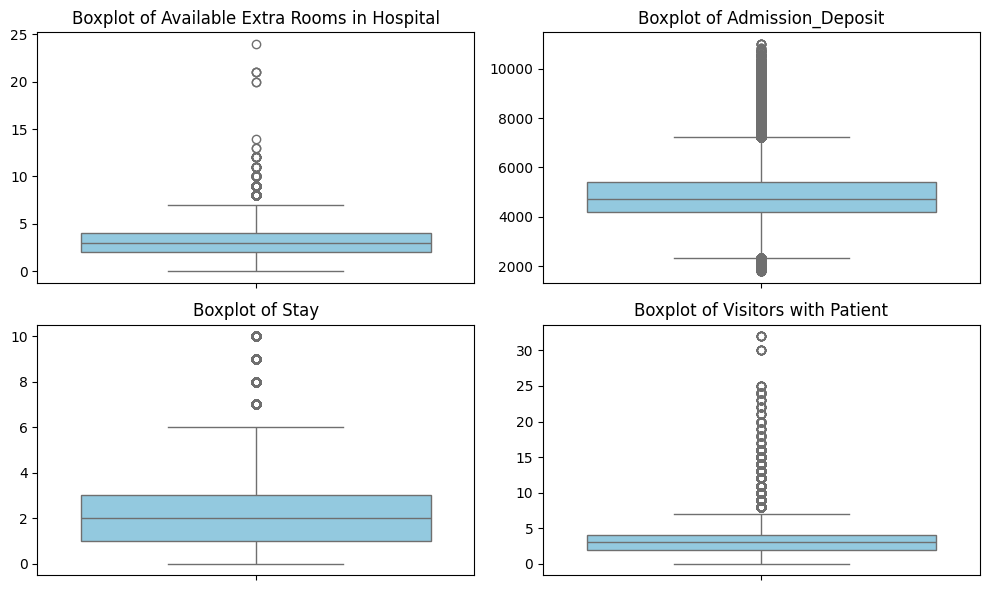

In [153]:


# List of numerical columns to check for outliers
numerical_columns = ['Available Extra Rooms in Hospital', 'Admission_Deposit', 'Stay', 'Visitors with Patient']

# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')


plt.tight_layout()
plt.show()


 🚨 **Outlier Detection and Treatment**

In my analysis of the dataset, I found some interesting patterns regarding the outliers:

1. **Deposit**:
   - The values typically range from 2,000 to 8,000, so everything looks normal here.( i will deal with it later with when i see the skew)
2. **Stay**:
   - The stay duration typically ranges between 0 and 6 days, with a few rare instances going up to 10 days. This is also acceptable.
3. **Hospital Rooms**:
    - Additionally, when the number of rooms is **0**, it's a critical issue. Therefore, I will flag these rows with a **"No Rooms Available"** flag (**1** for problematic, **0** for not problematic).

4. **Visitors with Patient**:
   - While the usual number of visitors per patient is between 0 and 9, there are instances where more than 20 visitors are recorded. To handle this, I will **bin** the data into three categories:
     - 0 to 7 visitors -> **0**
     - 7 to 14 visitors -> **1**
     - More than 14 visitors -> **2**
   This will help avoid unnecessary congestion and noise in the hospital.

---

In [154]:
# Creating a new column 'No_Rooms_Available' to flag rows where 'Available Extra Rooms in Hospital' is 0
df_train['No_Rooms_Available'] = (df_train['Available Extra Rooms in Hospital'] == 0).astype(int)

# Check the updated data
df_train[['Available Extra Rooms in Hospital', 'No_Rooms_Available']].head()


,Available Extra Rooms in Hospital,No_Rooms_Available
0,3,0
1,2,0
2,2,0
3,2,0
4,2,0


In [155]:
# Create bins for 'Visitors with Patient'
bins = [0, 7, 14, float('inf')]  # Bins for 0-7, 7-14, and 14+
labels = [0, 1, 2]  # Labels for each bin

# Create a new column with the binned categories
df_train['Visitors Binned'] = pd.cut(df_train['Visitors with Patient'], bins=bins, labels=labels)

# Check the result of binning
df_train[['Visitors with Patient', 'Visitors Binned']].head()


,Visitors with Patient,Visitors Binned
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [156]:
data = df_train.copy()
q1,q3 = data['Available Extra Rooms in Hospital'].quantile(0.25) ,data['Available Extra Rooms in Hospital'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr # no need for this since the min is 0
upper_bound = q3 + 1.5 * iqr
print(upper_bound)
outlier_percentage_top = (data['Available Extra Rooms in Hospital'] > upper_bound).mean() * 100
df_train['Available Extra Rooms in Hospital'] = mstats.winsorize(data['Available Extra Rooms in Hospital'], limits =[0,outlier_percentage_top ])

7.0


In [157]:
outlier_percentage_top

0.42425841137050224

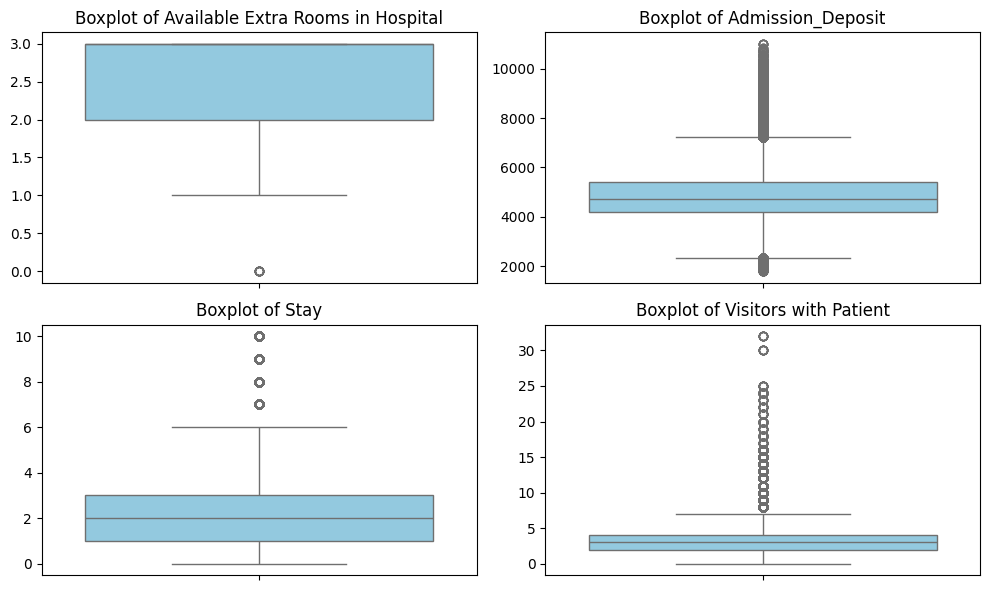

In [158]:


# List of numerical columns to check for outliers
numerical_columns = ['Available Extra Rooms in Hospital', 'Admission_Deposit', 'Stay', 'Visitors with Patient']

# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')


plt.tight_layout()
plt.show()


I need to handle this skew if i want to standaradize my data

In [159]:
df_train.dtypes

,0
case_id,int64
Hospital_code,int64
City_Code_Hospital,int64
Available Extra Rooms in Hospital,int64
Bed Grade,float64
patientid,int64
City_Code_Patient,float64
Type of Admission,int64
Severity of Illness,int64
Visitors with Patient,int64


In [160]:
# Convert the 'Visitors Binned' column to a categorical type and get integer codes
df_train['Visitors Binned'] = pd.Categorical(df_train['Visitors Binned']).codes

# Check the conversion
df_train['Visitors Binned'].dtype


dtype('int8')

In [161]:
# Check skewness of numerical columns
skewness = df_train.skew()

# Display the columns with skewness values greater than 1 or less than -1
skewed_columns = skewness[(skewness > 1) | (skewness < -1)].index
skewed_columns


Index(['Available Extra Rooms in Hospital', 'City_Code_Patient',
       'Visitors with Patient', 'Stay', 'b', 'c', 'd', 'e', 'f', 'g', 'Z',
       'TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery', 'P', 'S', 'T', 'U', 'A', 'B', 'C', 'D', 'E',
       'No_Rooms_Available', 'Visitors Binned'],
      dtype='object')

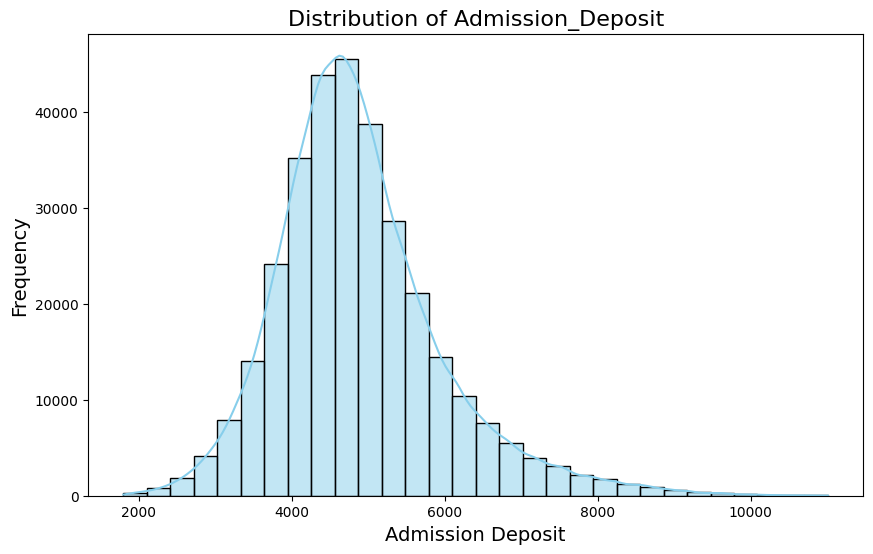

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Admission_Deposit'], kde=True, bins=30, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Admission_Deposit', fontsize=16)
plt.xlabel('Admission Deposit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()


### Standardizing

In [163]:

# Initialize the StandardScaler
scaler = StandardScaler()
stand_train = df_train.copy()

# Fit and transform the numerical columns
stand_train = pd.DataFrame(scaler.fit_transform(stand_train),columns=stand_train.columns)

# Display the standardized data
stand_train.head()


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,T,U,A,B,C,D,E,F,No_Rooms_Available,Visitors Binned
0,-1.732045,-1.195176,-0.571055,0.673228,-0.716728,-0.904442,-0.053076,-1.136165,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633,-0.006863,-0.172173
1,-1.732034,-1.890124,0.073580,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633,-0.006863,-0.172173
2,-1.732024,-0.963527,-1.215691,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394,-0.006863,-0.172173
3,-1.732013,0.889668,-0.893373,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394,-0.006863,-0.172173
4,-1.732002,0.889668,-0.893373,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394,-0.006863,-0.172173


In [164]:
df_train=stand_train.copy()


In [165]:
# Check the mean and standard deviation after standardization
df_train.mean(), df_train.std()


(case_id                             -6.854670e-17
 Hospital_code                        1.924306e-16
 City_Code_Hospital                   9.817886e-17
 Available Extra Rooms in Hospital   -1.288821e-16
 Bed Grade                           -2.071417e-16
 patientid                            1.159515e-16
 City_Code_Patient                    2.607613e-17
 Type of Admission                    4.712585e-17
 Severity of Illness                 -3.712946e-17
 Visitors with Patient                6.247746e-17
 Age                                  1.385214e-16
 Admission_Deposit                    4.177064e-17
 Stay                                -9.996393e-17
 a                                   -2.391994e-17
 b                                    4.480526e-17
 c                                    3.213126e-17
 d                                   -3.784349e-17
 e                                    4.641183e-17
 f                                    2.302741e-17
 g                             

### Handeling Null Values 2.0

In [166]:

# Select the specific columns you want to use for imputation
columns_to_impute = [
    'Hospital_code',
    'City_Code_Hospital',
    'Available Extra Rooms in Hospital',
    'Bed Grade',
    'City_Code_Patient',
    'Type of Admission',
    'Visitors with Patient',
    'anesthesia',
    'gynecology',
    'radiotherapy',
    'surgery',
    'No_Rooms_Available'
]

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer only to the selected columns
df_train[columns_to_impute] = knn_imputer.fit_transform(df_train[columns_to_impute])

# Display the first few rows of the imputed data
df_train.head()


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,T,U,A,B,C,D,E,F,No_Rooms_Available,Visitors Binned
0,-1.732045,-1.195176,-0.571055,0.673228,-0.716728,-0.904442,-0.053076,-1.136165,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633,-0.006863,-0.172173
1,-1.732034,-1.890124,0.073580,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633,-0.006863,-0.172173
2,-1.732024,-0.963527,-1.215691,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394,-0.006863,-0.172173
3,-1.732013,0.889668,-0.893373,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394,-0.006863,-0.172173
4,-1.732002,0.889668,-0.893373,-1.284236,-0.716728,-0.904442,-0.053076,0.315306,1.646648,-0.727923,...,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394,-0.006863,-0.172173


In [167]:
df_train.isnull().sum()

,0
case_id,0
Hospital_code,0
City_Code_Hospital,0
Available Extra Rooms in Hospital,0
Bed Grade,0
patientid,0
City_Code_Patient,0
Type of Admission,0
Severity of Illness,0
Visitors with Patient,0


### Handeling Inbalanced data

In [168]:
# Check the balance for the 'Hospital_code' column
hospital_code_counts = df_train['Hospital_code'].value_counts()

# Check the balance for the 'Severity of Illness' column
severity_illness_counts = df_train['Severity of Illness'].value_counts()

# Display the results
print("Hospital Code Distribution:\n", hospital_code_counts)
print("\nSeverity of Illness Distribution:\n", severity_illness_counts)


Hospital Code Distribution:
 Hospital_code
 0.889668    33076
 0.542194    26566
 0.078895    21219
-1.426825    20425
-0.847702    17328
-0.500228    17328
 1.121317    17137
 1.005492    14244
-1.079351    11510
 1.237141    11311
-0.731877    11297
 1.584615    10703
 0.773843     9834
-0.963527     9435
-0.384404     9257
 0.310544     8150
 0.658018     7992
-1.774299     7116
-0.152754     5501
-1.542650     5261
-2.005949     5249
-0.616053     5236
-1.890124     5102
 1.352966     5002
 0.426369     4277
 1.468791     3967
-0.268579     3671
-1.195176     3663
-0.036930     3630
 0.194720     1405
-1.311001     1306
-1.658475     1240
Name: count, dtype: int64

Severity of Illness Distribution:
 Severity of Illness
 0.138090    175843
-1.370469     85872
 1.646648     56723
Name: count, dtype: int64


<ipython-input-169-48e202950a4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hospital_code', data=df_train, palette='Set2')


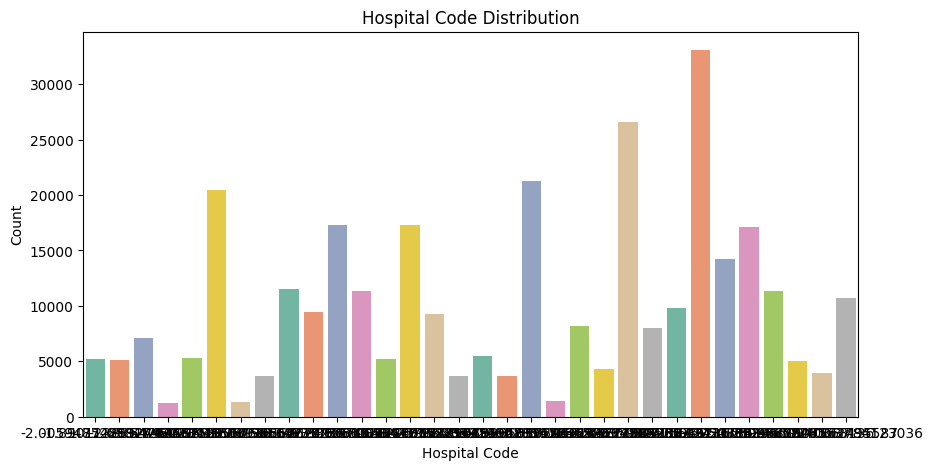

<ipython-input-169-48e202950a4a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity of Illness', data=df_train, palette='Set2')


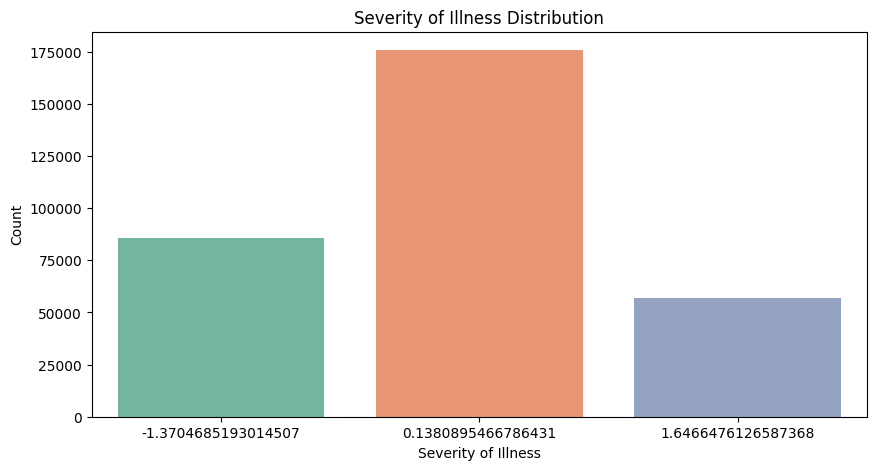

In [169]:

# Plot distribution for 'Hospital_code'
plt.figure(figsize=(10, 5))
sns.countplot(x='Hospital_code', data=df_train, palette='Set2')
plt.title('Hospital Code Distribution')
plt.xlabel('Hospital Code')
plt.ylabel('Count')
plt.show()

# Plot distribution for 'Severity of Illness'
plt.figure(figsize=(10, 5))
sns.countplot(x='Severity of Illness', data=df_train, palette='Set2')
plt.title('Severity of Illness Distribution')
plt.xlabel('Severity of Illness')
plt.ylabel('Count')
plt.show()


In [170]:
# Define the thresholds for the categories
bins = [-float('inf'), -1, 1, float('inf')]
labels = ['High', 'Medium', 'Low']

# Create a new column 'Severity_Category' by binning the 'Severity of Illness' values
df_train['Severity_Category'] = pd.cut(df_train['Severity of Illness'], bins=bins, labels=labels)

# Check the new categories and their distribution
severity_category_counts = df_train['Severity_Category'].value_counts()
print(severity_category_counts)
#df_train.drop(columns=['Severity_Category'])
df_train.columns

Severity_Category
Medium    175843
High       85872
Low        56723
Name: count, dtype: int64


Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'X', 'Y', 'Z', 'TB & Chest disease',
       'anesthesia', 'gynecology', 'radiotherapy', 'surgery', 'P', 'Q', 'R',
       'S', 'T', 'U', 'A', 'B', 'C', 'D', 'E', 'F', 'No_Rooms_Available',
       'Visitors Binned', 'Severity_Category'],
      dtype='object')

In [171]:
!pip install imbalanced-learn


In [172]:

# First, create the categories for Severity of Illness
bins = [-float('inf'), -1, 1, float('inf')]
labels = ['High', 'Medium', 'Low']
df_train['Severity_Category'] = pd.cut(df_train['Severity of Illness'], bins=bins, labels=labels)

# Split the features and target variable
X = df_train.drop('Severity_Category', axis=1)  # All columns except 'Severity_Category'
y = df_train['Severity_Category']  # Target column

# Initialize SMOTE (Safe Level SMOTE is part of imbalanced-learn)
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)  # You can adjust k_neighbors

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the resampled data
print(pd.Series(y_resampled).value_counts())

# Optionally: Check the shape of the resampled data
print(X_resampled.shape, y_resampled.shape)


Severity_Category
High      175843
Medium    175843
Low       175843
Name: count, dtype: int64
(527529, 42) (527529,)


<ipython-input-173-178648eaa93c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity_Category', data=df_resampled, palette='Set2')


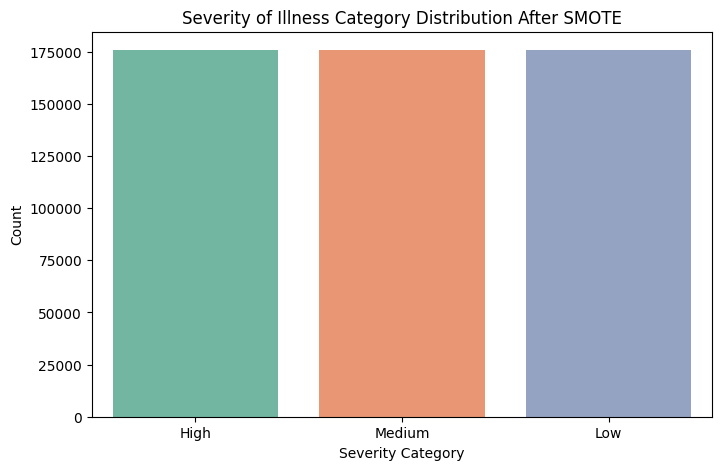

In [173]:


# Create a DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Severity_Category'] = y_resampled

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity_Category', data=df_resampled, palette='Set2')
plt.title('Severity of Illness Category Distribution After SMOTE')
plt.xlabel('Severity Category')
plt.ylabel('Count')
plt.show()


okay now we have a good data to work with for our model to just the problem is we have some extra columns that not gonna help us with our goals let's see what to do with them

In [174]:
balanced_df = df_resampled.drop(columns='Severity_Category')
balanced_df.shape


(527529, 42)

In [175]:
clean_patient_df = balanced_df[['Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Visitors with Patient',
                                'Age','Stay','anesthesia','gynecology','radiotherapy','surgery','TB & Chest disease']].copy()

In [176]:
balanced_df.nunique()

,0
case_id,527529
Hospital_code,25899
City_Code_Hospital,7282
Available Extra Rooms in Hospital,9152
Bed Grade,57247
patientid,296702
City_Code_Patient,122882
Type of Admission,28397
Severity of Illness,3
Visitors with Patient,83730


In [177]:


# Calculate the correlation matrix
corr_matrix = clean_patient_df.corr()

# Create a boolean mask to identify pairs with correlation greater than 0.7
high_corr_var = set()

# Loop through the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # If correlation > 0.7
            colname = corr_matrix.columns[i]  # Get column name
            high_corr_var.add(colname)  # Add it to the set

# Drop the highly correlated features
clean_patient_df_dropped = clean_patient_df.drop(columns=high_corr_var)

# Show the cleaned DataFrame and the dropped columns
print(f"Dropped columns due to high correlation: {high_corr_var}")
print(f"Shape of the cleaned DataFrame: {clean_patient_df_dropped.shape}")


Dropped columns due to high correlation: set()
Shape of the cleaned DataFrame: (527529, 12)


### Reduction of Dimantionality

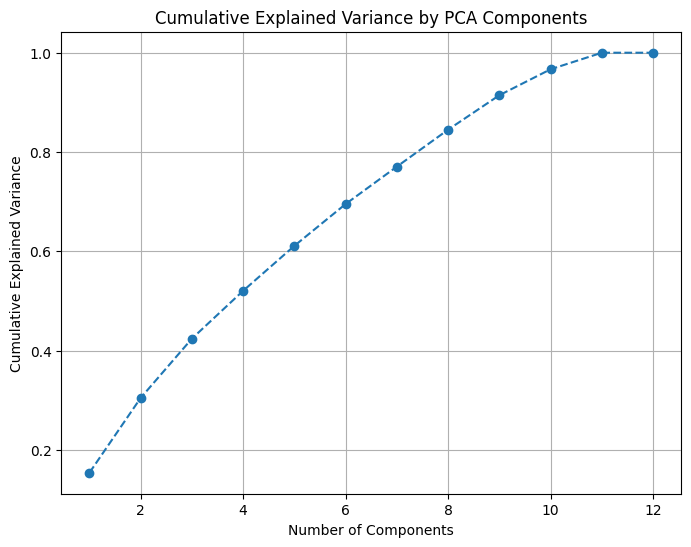

In [178]:
# Fit PCA
pca = PCA()
pca.fit(clean_patient_df_dropped)

# Transform the data into the PCA space (X_pca)
X_pca = pca.transform(clean_patient_df_dropped)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [179]:
# Find the number of components that explain at least 90% of the variance
n_components_75 = np.argmax(explained_variance >= 0.75) + 1
print(f"Number of components to explain 75% variance: {n_components_75}")


Number of components to explain 75% variance: 7


# Modeling

In [180]:
# Fit PCA with 7 components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(clean_patient_df_dropped)


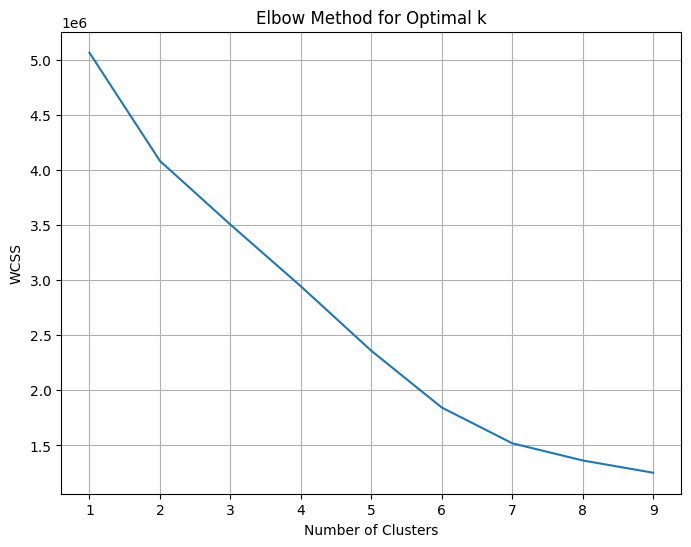

In [181]:
# Calculate the sum of squared distances for different numbers of clusters (elbow method)
wcss = []  # Within-cluster sum of squares

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)  # X_pca is now correctly transformed PCA data
    wcss.append(kmeans.inertia_)  # Append the WCSS value for the current number of clusters

# Plot the WCSS to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [182]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to your original data (optional)
clean_patient_df['Cluster'] = labels  # df_train is your original DataFrame


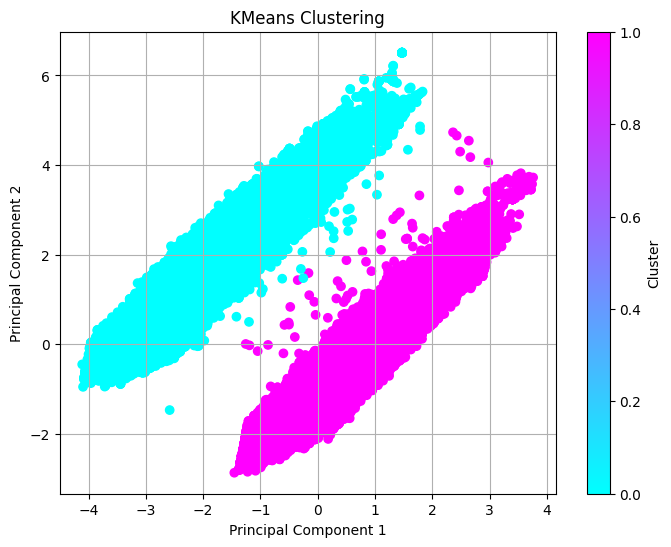

In [183]:
# Visualize the clusters using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 1], X_pca[:, 0], c=labels, cmap='cool')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Good just 1 problem what is this graph we come with a goal and this graph we re not getting any thing something must get fixed

In [184]:
clean_patient_df.drop(columns=['Cluster'] ,inplace=True)


In [185]:
df_pca_comp = pd.DataFrame(pca.components_,
                           columns = clean_patient_df.columns.values,
                           index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [186]:
df_pca_comp

,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Stay,anesthesia,gynecology,radiotherapy,surgery,TB & Chest disease
PC1,-0.211186,-0.025521,-0.019529,0.625627,0.196799,0.253841,0.256217,0.225882,-0.454304,0.321487,0.131897,0.126415
PC2,-0.368915,0.000762,-0.094889,0.451150,0.159731,0.036752,0.209798,-0.403438,0.553978,-0.284789,-0.002742,-0.172382
PC3,0.363877,-0.016467,-0.043774,-0.304672,0.654060,0.072021,0.580372,-0.031501,0.036622,-0.008789,-0.004743,-0.018318
PC4,-0.176805,0.122041,-0.501857,-0.260729,0.013202,0.024596,-0.086269,-0.407152,-0.061092,0.383906,0.555783,-0.001243
PC5,0.098979,-0.060455,0.053764,0.063887,-0.002231,-0.082352,0.003247,0.339274,0.010676,-0.540959,0.750936,0.031885
PC6,-0.069170,-0.045045,0.044244,0.015160,0.058398,-0.273411,0.036123,-0.276501,-0.063912,-0.152435,-0.051012,0.897304
PC7,-0.076650,0.648925,-0.520537,-0.028907,0.054738,0.186956,-0.057509,0.301487,-0.020943,-0.305765,-0.238903,0.134427


([<matplotlib.axis.YTick at 0x7857c0010c40>,
 [Text(0, 1, 'Component 1'),
  Text(0, 2, 'Component 2'),
  Text(0, 3, 'Component 3'),
  Text(0, 4, 'Component 4'),
  Text(0, 5, 'Component 5'),
  Text(0, 6, 'Component 6'),
  Text(0, 7, 'Component 7')])

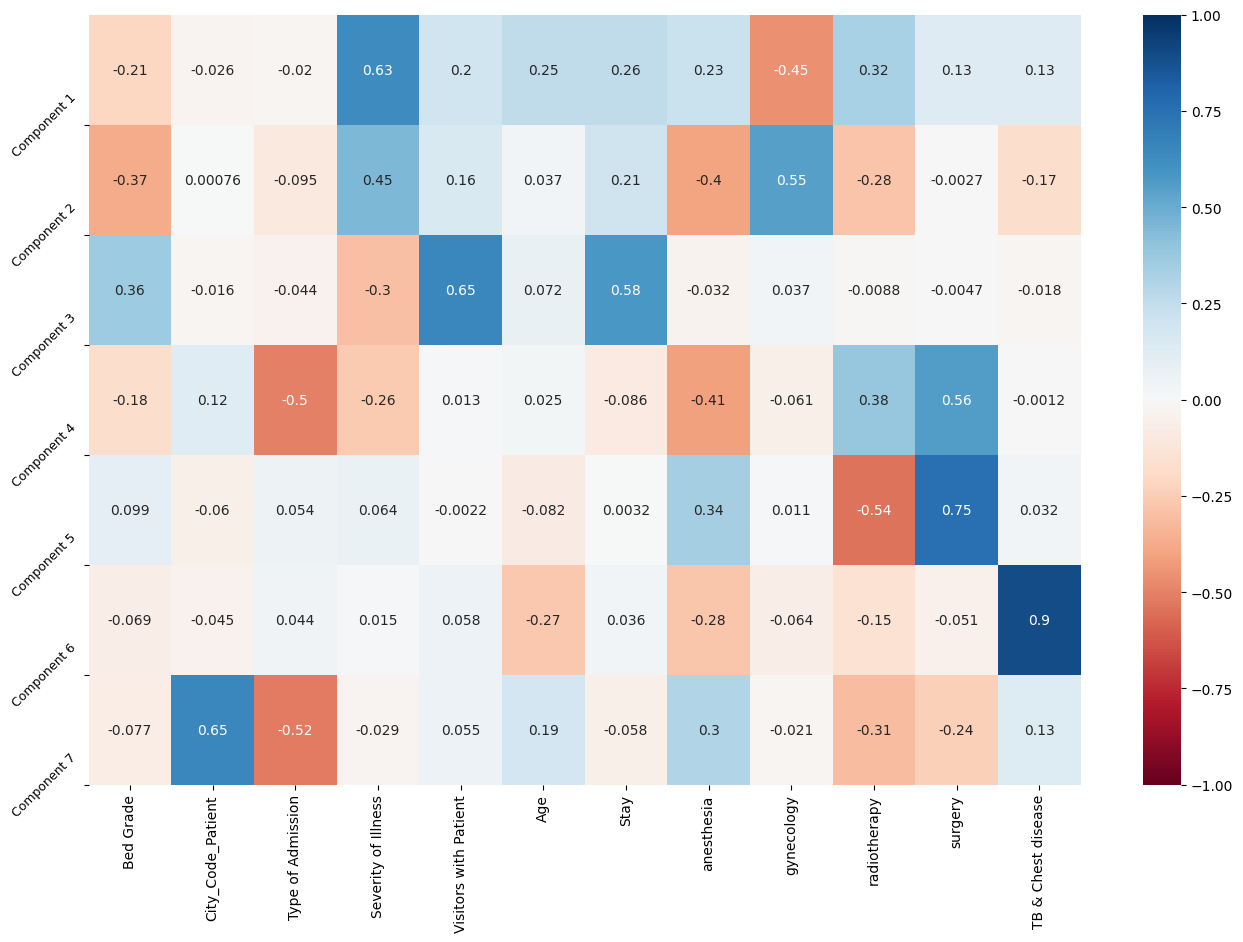

In [187]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_pca_comp,
            cmap = 'RdBu',
            vmin = -1,
            vmax = 1,
            annot = True)
plt.yticks([1,2,3,4,5,6,7],
           ['Component 1', 'Component 2','Component 3','Component 4','Component 5','Component 6','Component 7'],
            rotation = 45,
            fontsize = 9
           )

In [237]:
scores_pca = pca.transform(clean_patient_df)
scores_pca

array([[ 2.54599404, -1.12715275, -1.91799926, ..., -1.97805309,
        -0.61673911, -0.35995166],
       [ 2.99431532, -0.87457243, -0.90181129, ..., -1.89397643,
        -0.48531742, -1.22248507],
       [ 2.52657991, -1.36313606, -1.24936922, ...,  1.16661796,
        -0.9198001 ,  0.91263521],
       ...,
       [ 0.59876477,  0.94110549, -0.70169059, ..., -0.00365211,
        -0.54472632,  0.51373947],
       [ 2.71622077, -1.31554144, -0.83091475, ..., -1.92694953,
        -0.83446038, -0.23023979],
       [ 1.12003973,  1.90863503, -0.4299056 , ..., -0.15852542,
        -0.11092724,  0.92561862]])

In [238]:
kmeans_pca = KMeans(n_clusters = 6,init = 'k-means++',random_state=42)
kmeans_pca.fit(clean_patient_df)

KMeans(n_clusters=6, random_state=42)

In [239]:
df_segm_pca_kmeans = pd.concat([clean_patient_df.reset_index(drop = True),pd.DataFrame(scores_pca)], axis =1)
df_segm_pca_kmeans.columns.values[-7:] = ['dangerous_not_Gynecology','dangerous_Gynecolgy','hard_patient','Surgery r_not_A','Surgery A_not_r','TB','city_admition']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [241]:
df_segm_pca_kmeans.shape

(527529, 20)

1 a high tb and have a lot of visitors stay a lot not dangerous
2 Surgery A_not_r
3 dangerous  not gynecolgy
4 same city
5 dangerous_Gynecolgy
6 Surgery r_not_A

In [243]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby('Segment K-means PCA').mean()
df_segm_pca_kmeans_freq

,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Stay,anesthesia,gynecology,radiotherapy,surgery,TB & Chest disease,dangerous_not_Gynecolgy,dangerous_Gynecolgy,hard_patient,Surgery r_not_A,Surgery A_not_r,TB,city_admition
Segment K-means PCA,,,,,,,,,,,,,,,,,,,
0,0.489835,0.039875,-0.016905,-1.006611,-0.208572,-0.228584,-0.327077,-0.320386,0.525694,-0.313620,-0.061529,-0.176175,-1.457101,-0.280778,0.227157,0.173327,0.005581,-0.063851,-0.032000
1,0.432838,-0.047619,0.253396,0.204477,-0.220600,0.158220,-0.158184,3.120830,-1.902100,-0.313612,-0.061529,-0.176175,1.328940,-2.424618,-0.252260,-1.536680,1.207449,-0.922343,0.890152
2,-0.688725,-0.011888,-0.016185,1.057451,-0.200514,0.074869,-0.126915,-0.320393,0.525686,-0.313603,-0.061529,-0.176173,0.214342,1.139530,-0.686442,-0.172824,-0.000406,-0.023941,0.010361
3,0.113737,-0.056033,0.066331,0.219760,0.031768,-0.075141,-0.067508,-0.320416,-1.902171,-0.313620,-0.061529,5.676184,1.385962,-1.852053,-0.162623,-0.007788,0.205321,5.376738,0.720280
4,-0.081399,0.031883,-0.101684,0.241893,-0.024794,0.312971,0.022310,-0.320413,-1.902077,3.188433,-0.061529,-0.176175,1.938452,-1.718448,-0.114951,1.468770,-1.939537,-0.512182,-0.914116
5,0.253618,-0.053887,-0.130507,0.454245,1.802416,0.289870,1.916367,-0.257125,0.335102,-0.268664,0.705170,-0.174503,0.830187,1.140781,2.344280,0.154797,0.606097,-0.019217,-0.153470


In [244]:
df_segm_pca_kmeans_freq_renamed= df_segm_pca_kmeans_freq.rename({
    0: "Safe Patient",
    1: "dangerous_Gynecolgy ,Surgery A_not_r,not TB ",
    2: "dangerous_Gynecolgy , good patient",
    3: "danerous TB  ",
    4: "surgery,dangerous_not_Gynecolgy",
    5: "Dangerous_all, hard_patient",
})

In [245]:
df_segm_pca_kmeans_freq_renamed

,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Stay,anesthesia,gynecology,radiotherapy,surgery,TB & Chest disease,dangerous_not_Gynecolgy,dangerous_Gynecolgy,hard_patient,Surgery r_not_A,Surgery A_not_r,TB,city_admition
Segment K-means PCA,,,,,,,,,,,,,,,,,,,
Safe Patient,0.489835,0.039875,-0.016905,-1.006611,-0.208572,-0.228584,-0.327077,-0.320386,0.525694,-0.313620,-0.061529,-0.176175,-1.457101,-0.280778,0.227157,0.173327,0.005581,-0.063851,-0.032000
"dangerous_Gynecolgy ,Surgery A_not_r,not TB",0.432838,-0.047619,0.253396,0.204477,-0.220600,0.158220,-0.158184,3.120830,-1.902100,-0.313612,-0.061529,-0.176175,1.328940,-2.424618,-0.252260,-1.536680,1.207449,-0.922343,0.890152
"dangerous_Gynecolgy , good patient",-0.688725,-0.011888,-0.016185,1.057451,-0.200514,0.074869,-0.126915,-0.320393,0.525686,-0.313603,-0.061529,-0.176173,0.214342,1.139530,-0.686442,-0.172824,-0.000406,-0.023941,0.010361
danerous TB,0.113737,-0.056033,0.066331,0.219760,0.031768,-0.075141,-0.067508,-0.320416,-1.902171,-0.313620,-0.061529,5.676184,1.385962,-1.852053,-0.162623,-0.007788,0.205321,5.376738,0.720280
"surgery,dangerous_not_Gynecolgy",-0.081399,0.031883,-0.101684,0.241893,-0.024794,0.312971,0.022310,-0.320413,-1.902077,3.188433,-0.061529,-0.176175,1.938452,-1.718448,-0.114951,1.468770,-1.939537,-0.512182,-0.914116
"Dangerous_all, hard_patient",0.253618,-0.053887,-0.130507,0.454245,1.802416,0.289870,1.916367,-0.257125,0.335102,-0.268664,0.705170,-0.174503,0.830187,1.140781,2.344280,0.154797,0.606097,-0.019217,-0.153470


In [254]:
df_segm_pca_kmeans['legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({
    0: "Safe Patient",
    1: "dangerous_Gynecolgy ",
    2: "dangerous_disease_not_gy ",
    3: "dangerous TB  ",
    4: "surgery,dangerous_diseasenot_gy",
    5: "Dangerous_all, bad_patient",
})

<Axes: xlabel='dangerous_not_Gynecolgy', ylabel='hard_patient'>

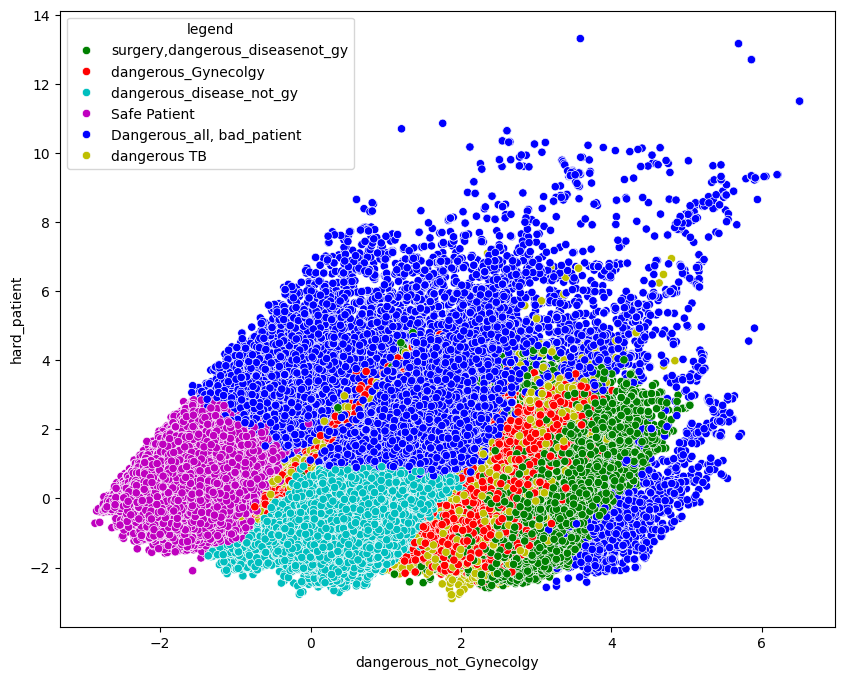

In [259]:
x_axis = df_segm_pca_kmeans['dangerous_not_Gynecolgy']
y_axis = df_segm_pca_kmeans['hard_patient']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis,hue = df_segm_pca_kmeans['legend'],palette = ['g','r','c','m','b','y'])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.lines as mlines

# Example DataFrame (replace this with your actual DataFrame)
# df_segm_pca_kmeans = pd.DataFrame(...)

# Define the axes
x_axis = df_segm_pca_kmeans['dangerous_not_Gynecolgy']
y_axis = df_segm_pca_kmeans['hard_patient']
z_axis = df_segm_pca_kmeans['dangerous_Gynecolgy']  # Replace with the actual column for the z-axis

# Encode the 'legend' column to numeric values for color mapping
label_encoder = LabelEncoder()
color_values = label_encoder.fit_transform(df_segm_pca_kmeans['legend'])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot with the encoded colors
scatter = ax.scatter(x_axis, y_axis, z_axis, c=color_values, cmap='viridis')

# Add labels for the axes
ax.set_xlabel('Dangerous Not Gynecology')
ax.set_ylabel('dangerous_Gynecolgy')
ax.set_zlabel('Hard Patient')

# Create custom legend handles
handles = []
for label in df_segm_pca_kmeans['legend'].unique():
    color = label_encoder.transform([label])[0]  # Find the color corresponding to each category
    handle = mlines.Line2D([], [], marker='o', color=plt.cm.viridis(color / len(df_segm_pca_kmeans['legend'].unique())), linestyle='None', markersize=10, label=label)
    handles.append(handle)

# Add the custom legend
ax.legend(handles=handles, title="Legend")

# Show the plot
plt.show()


In [274]:
db_data = df_segm_pca_kmeans[['dangerous_not_Gynecolgy','dangerous_Gynecolgy','hard_patient','Surgery r_not_A','Surgery A_not_r','TB','city_admition']]

In [275]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [276]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(db_data)  # assuming df contains the features you need to cluster


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)


In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [ ]:
Z = linkage(data_scaled, method='ward')  # Ward minimizes the variance within clusters


In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hc.fit_predict(data_scaled)


In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()
